# ODI First innings score prediction system

## P.CHETHAN SAI KUMAR REDDY
## AM.EN.U4CSE19243

## Definition

As we know Cricket is the foremost loved game, after football and most loved game in our India. There are many people who tries to predict the scores of matches based on their individual cricket sense. Cricket has certain rules and game system. When a cricket match is played many factors comes into consideration such as venue, players performance etc. In this project we are going to predict final score of a team in a match by analyzing data of previous matches. We use features such as current score and no of wickets and score in last few overs. Our system finally present quantitative results displayed by best suitable algorithm having highest accuracy. Cricket is a sport with multiple formats, different playing standards and varying duration. T20 and ODI are two limited overs formats among them. We try to predict scores in these two formats in our project.

## Dataset

We have found suitable datasets required for our project in Kaggle website.

The data is about previous records of ball-to-ball information mapped by a batsman to a bowler which includes runs, wickets, overs, runs scored in last 5 overs, wickets for last 5 overs, strike, non-striker. The datasets are being used by various cricket teams to plan against opponent team players to compare their stats against their bowlers and viceversa.

Our Datasets are IPL,ODI ,BBLand T20 scores datasets

## Prepare data

In [2]:
# Importing essential libraries
import pandas as pd

# Loading the dataset
data = pd.read_csv('odi.csv')

In [3]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


In [4]:
data.describe(include='all')

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,350899.000000,350899,350899,350899,350899,350899,350899,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000
unique,NaN,1042,136,21,21,938,709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2007-02-04,Shere Bangla National Stadium,Australia,India,KC Sangakkara,Shahid Afridi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,23577,44876,45141,6822,4780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,594.360426,NaN,NaN,NaN,NaN,NaN,NaN,114.801661,2.974970,24.052899,23.548303,0.669814,35.180129,12.427944,255.355387
std,343.605128,NaN,NaN,NaN,NaN,NaN,NaN,77.665959,2.298959,14.235439,11.042974,0.833895,28.115264,15.019181,62.354412
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
25%,296.000000,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,1.000000,11.600000,17.000000,0.000000,13.000000,2.000000,217.000000
50%,596.000000,NaN,NaN,NaN,NaN,NaN,NaN,105.000000,3.000000,23.600000,23.000000,0.000000,29.000000,7.000000,257.000000
75%,893.000000,NaN,NaN,NaN,NaN,NaN,NaN,168.000000,4.000000,36.200000,29.000000,1.000000,50.000000,18.000000,298.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             350899 non-null  int64  
 1   date            350899 non-null  object 
 2   venue           350899 non-null  object 
 3   bat_team        350899 non-null  object 
 4   bowl_team       350899 non-null  object 
 5   batsman         350899 non-null  object 
 6   bowler          350899 non-null  object 
 7   runs            350899 non-null  int64  
 8   wickets         350899 non-null  int64  
 9   overs           350899 non-null  float64
 10  runs_last_5     350899 non-null  int64  
 11  wickets_last_5  350899 non-null  int64  
 12  striker         350899 non-null  int64  
 13  non-striker     350899 non-null  int64  
 14  total           350899 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


In [6]:
# --- Data Cleaning ---
# Removing unwanted columns to make sure the variables which are not needed in generating model are being removed
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
data.drop(labels=columns_to_remove, axis=1, inplace=True)

In [7]:
data['bat_team'].unique()

array(['England', 'Pakistan', 'Sri Lanka', 'Australia', 'South Africa',
       'New Zealand', 'Bangladesh', 'West Indies', 'India', 'Zimbabwe',
       'Ireland', 'Scotland', 'Kenya', 'Bermuda', 'Netherlands', 'Canada',
       'Asia XI', 'Afghanistan', 'United Arab Emirates', 'Hong Kong',
       'Papua New Guinea'], dtype=object)

In [8]:
# Keeping only consistent teams which are playing against all remaining of consistent teams
consistent_teams=['England','India','Pakistan','Sri Lanka','Australia','South Africa','New Zealand','Bangladesh','West Indies',
                 'Ireland','Zimbabwe']
#Dropping all other teams instead of these consistent teams from both batting and bowling rows
data = data[(data['bat_team'].isin(consistent_teams)) & (data['bowl_team'].isin(consistent_teams))]

In [9]:
#Removing the first 5 overs data in every match to avoid the false prediction
# We cant predict the score by seeing the score in 5 overs we need 
# atleast 5+ overs to estimate considering real world situation
data = data[data['overs']>=5.0]
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
33,2006-06-13,England,Ireland,33,0,5.1,27,0,301
34,2006-06-13,England,Ireland,33,0,5.2,27,0,301
35,2006-06-13,England,Ireland,37,0,5.3,31,0,301
36,2006-06-13,England,Ireland,37,0,5.4,31,0,301
37,2006-06-13,England,Ireland,37,0,5.5,31,0,301


In [10]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [11]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_data = pd.get_dummies(data=data, columns=['bat_team', 'bowl_team'])
# Here we cannot apply teams directly so instead i hard coded all the teams in dataset
# 1 if it is batting or bowling or else 0

In [12]:
encoded_data.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Australia,bat_team_Bangladesh,bat_team_England,...,bowl_team_Bangladesh,bowl_team_England,bowl_team_India,bowl_team_Ireland,bowl_team_New Zealand,bowl_team_Pakistan,bowl_team_South Africa,bowl_team_Sri Lanka,bowl_team_West Indies,bowl_team_Zimbabwe
33,2006-06-13,33,0,5.1,27,0,301,0,0,1,...,0,0,0,1,0,0,0,0,0,0
34,2006-06-13,33,0,5.2,27,0,301,0,0,1,...,0,0,0,1,0,0,0,0,0,0
35,2006-06-13,37,0,5.3,31,0,301,0,0,1,...,0,0,0,1,0,0,0,0,0,0
36,2006-06-13,37,0,5.4,31,0,301,0,0,1,...,0,0,0,1,0,0,0,0,0,0
37,2006-06-13,37,0,5.5,31,0,301,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [13]:
encoded_data.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Australia', 'bat_team_Bangladesh',
       'bat_team_England', 'bat_team_India', 'bat_team_Ireland',
       'bat_team_New Zealand', 'bat_team_Pakistan', 'bat_team_South Africa',
       'bat_team_Sri Lanka', 'bat_team_West Indies', 'bat_team_Zimbabwe',
       'bowl_team_Australia', 'bowl_team_Bangladesh', 'bowl_team_England',
       'bowl_team_India', 'bowl_team_Ireland', 'bowl_team_New Zealand',
       'bowl_team_Pakistan', 'bowl_team_South Africa', 'bowl_team_Sri Lanka',
       'bowl_team_West Indies', 'bowl_team_Zimbabwe'],
      dtype='object')

In [14]:
# Rearranging the columns so target value will be at last
encoded_data=encoded_data[['date','bat_team_Australia', 'bat_team_Bangladesh',
       'bat_team_England', 'bat_team_India', 'bat_team_Ireland',
       'bat_team_New Zealand', 'bat_team_Pakistan', 'bat_team_South Africa',
       'bat_team_Sri Lanka', 'bat_team_West Indies', 'bat_team_Zimbabwe',
       'bowl_team_Australia', 'bowl_team_Bangladesh', 'bowl_team_England',
       'bowl_team_India', 'bowl_team_Ireland', 'bowl_team_New Zealand',
       'bowl_team_Pakistan', 'bowl_team_South Africa', 'bowl_team_Sri Lanka',
       'bowl_team_West Indies', 'bowl_team_Zimbabwe','overs','runs','wickets' ,'runs_last_5', 'wickets_last_5',
       'total',]]
encoded_data.head()

,date,bat_team_Australia,bat_team_Bangladesh,bat_team_England,bat_team_India,bat_team_Ireland,bat_team_New Zealand,bat_team_Pakistan,bat_team_South Africa,bat_team_Sri Lanka,...,bowl_team_South Africa,bowl_team_Sri Lanka,bowl_team_West Indies,bowl_team_Zimbabwe,overs,runs,wickets,runs_last_5,wickets_last_5,total
33,2006-06-13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,5.1,33,0,27,0,301
34,2006-06-13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,5.2,33,0,27,0,301
35,2006-06-13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,5.3,37,0,31,0,301
36,2006-06-13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,5.4,37,0,31,0,301
37,2006-06-13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,5.5,37,0,31,0,301


In [15]:
encoded_data.shape

(275294, 29)

In [16]:
encoded_data.columns

Index(['date', 'bat_team_Australia', 'bat_team_Bangladesh', 'bat_team_England',
       'bat_team_India', 'bat_team_Ireland', 'bat_team_New Zealand',
       'bat_team_Pakistan', 'bat_team_South Africa', 'bat_team_Sri Lanka',
       'bat_team_West Indies', 'bat_team_Zimbabwe', 'bowl_team_Australia',
       'bowl_team_Bangladesh', 'bowl_team_England', 'bowl_team_India',
       'bowl_team_Ireland', 'bowl_team_New Zealand', 'bowl_team_Pakistan',
       'bowl_team_South Africa', 'bowl_team_Sri Lanka',
       'bowl_team_West Indies', 'bowl_team_Zimbabwe', 'overs', 'runs',
       'wickets', 'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [17]:
encoded_data.describe()

,bat_team_Australia,bat_team_Bangladesh,bat_team_England,bat_team_India,bat_team_Ireland,bat_team_New Zealand,bat_team_Pakistan,bat_team_South Africa,bat_team_Sri Lanka,bat_team_West Indies,...,bowl_team_South Africa,bowl_team_Sri Lanka,bowl_team_West Indies,bowl_team_Zimbabwe,overs,runs,wickets,runs_last_5,wickets_last_5,total
count,275294.000000,275294.000000,275294.000000,275294.000000,275294.000000,275294.000000,275294.000000,275294.000000,275294.000000,275294.000000,...,275294.000000,275294.000000,275294.000000,275294.000000,275294.000000,275294.000000,275294.000000,275294.000000,275294.000000,275294.000000
mean,0.141104,0.072628,0.102549,0.106595,0.014563,0.094946,0.097205,0.100111,0.133868,0.076511,...,0.096391,0.103486,0.093762,0.069860,26.678321,128.038323,3.242871,25.258378,0.700295,257.462204
std,0.348129,0.259525,0.303369,0.308598,0.119794,0.293141,0.296237,0.300149,0.340511,0.265814,...,0.295128,0.304593,0.291497,0.254911,12.807562,72.912628,2.202782,10.182482,0.843690,60.760895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,44.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,15.500000,69.000000,2.000000,18.000000,0.000000,220.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,26.400000,118.000000,3.000000,24.000000,1.000000,259.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,37.500000,178.000000,5.000000,30.000000,1.000000,299.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,49.600000,444.000000,10.000000,101.000000,7.000000,444.000000


## Visualization

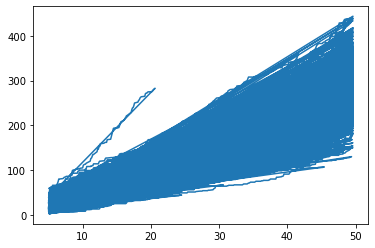

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(encoded_data.overs,encoded_data.runs)
plt.show()

Text(0.5, 1.0, 'Total score distribution plot')

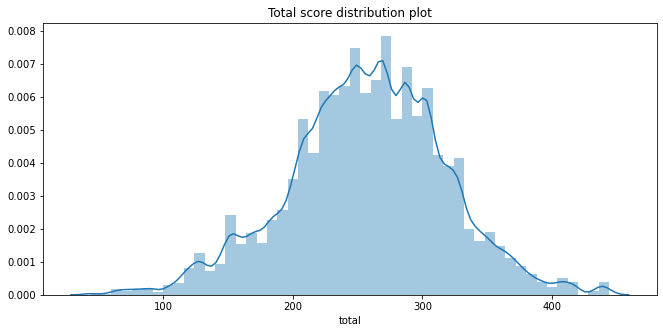

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#This makes it very easy to spot anamolies,such as outliers
plt.figure(figsize=[11,5])
sns.distplot(encoded_data['total'])
plt.title('Total score distribution plot')

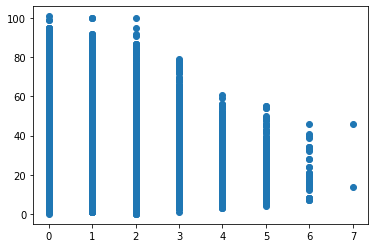

In [20]:
plt.scatter(encoded_data.wickets_last_5,encoded_data.runs_last_5)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d9c864f130>,
 'caps': [<matplotlib.lines.Line2D at 0x1d9c864f7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d9c8640d90>],
 'medians': [<matplotlib.lines.Line2D at 0x1d9c864feb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d9c86581f0>],
 'means': []}

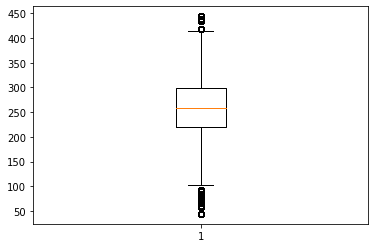

In [21]:
plt.boxplot(encoded_data.total)

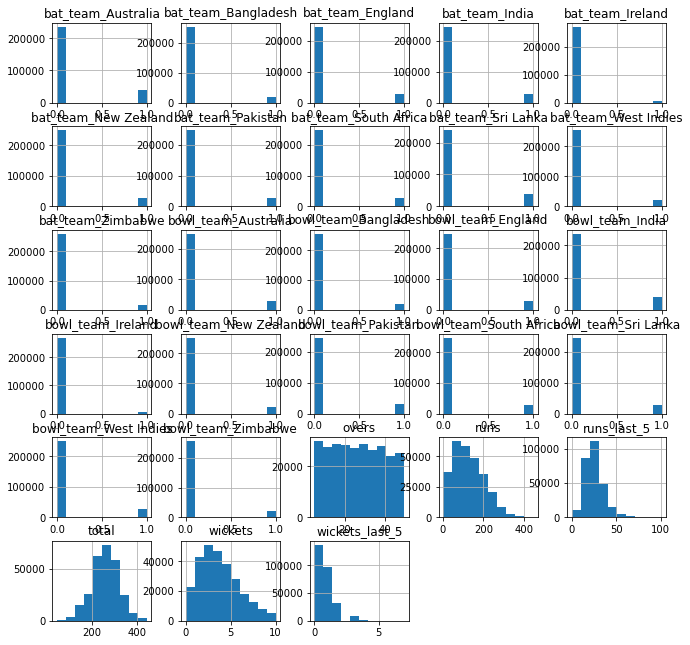

In [22]:
encoded_data.hist(figsize=[11,11])
plt.show()

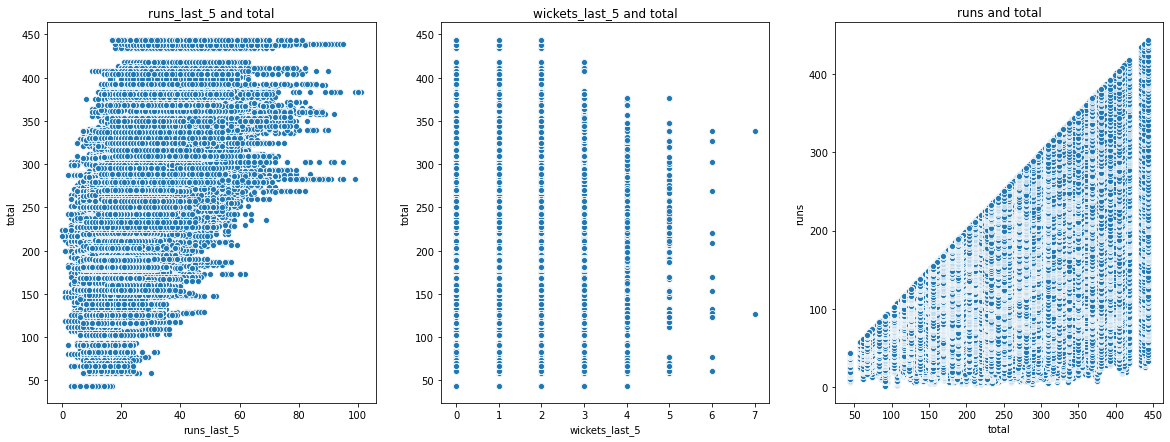

In [23]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("runs_last_5 and total")
sns.scatterplot(x='runs_last_5',y='total',data=encoded_data)
plt.subplot(1,3,2)
plt.title("wickets_last_5 and total")
sns.scatterplot(x='wickets_last_5',y='total',data=encoded_data)
plt.subplot(1,3,3)
plt.title("runs and total")
sns.scatterplot(y='runs',x='total',data=encoded_data)

## Python packages

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

### Supervised/Unsupervised learning

In [25]:
#In datasets related to time and date we have to split train and test sample based on date.
# I have seperated dataset based on year 2015 i.e => after 2015 comes under testing and remaining under training
X_train = encoded_data.drop(labels='total', axis=1)[encoded_data['date'].dt.year <= 2015]
X_test = encoded_data.drop(labels='total', axis=1)[encoded_data['date'].dt.year >= 2016]

In [26]:
y_train = encoded_data[encoded_data['date'].dt.year <= 2015]['total'].values
y_test = encoded_data[encoded_data['date'].dt.year >= 2016]['total'].values

In [27]:
#Removing date column as we dont need that to train model
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [28]:
# Data to be used for k-fold
X = X_train.append(X_test)
X = X.values
y = np.concatenate([y_train,y_test])

In [29]:
#To find accuracy of our model
def custom_accuracy(y_test,y_pred,thresold):
    ans = 0
    n = len(y_pred)
    for i in range(n):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            ans += 1
    return ((ans/n)*100)

### KNN-Implementation

In [30]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
k_acc = custom_accuracy(y_test,y_pred,20)
print("Custom accuracy for knn:" , k_acc)

Custom accuracy for knn: 37.092655642023345


### KNN-implementation from scratch

In [31]:
def euclidDistance(a,b):
    return np.linalg.norm(a-b)

In [32]:
def nearestNeighbors(trainingData,testSample,k):
    distances = []
    for x in trainingData:
        distances.append([x,euclidDistance(x[0:testSample.shape[0]],testSample)])
    distances.sort(key = lambda x : x[-1])
    distances = np.array(distances, dtype = 'object')
    return distances[0:k]

In [33]:
def predict(trainingData,testData,k):
    res = []
    for x in testData:
        neighbors = nearestNeighbors(trainingData,x,k)
        values = []
        for y in neighbors:
            values.append(y[0][-1])
        res.append(max(set(values),key = values.count))
    return res

In [34]:
trainingData = np.column_stack((np.array(X_train.values),np.array(y_train))) 
testingData = np.array(X_test.values[0:30])
pred = predict(trainingData,testingData,5)
print("Custom accuracy for KNN(scratch):" , custom_accuracy(y_test,pred,20))

Custom accuracy for KNN(scratch): 33.33333333333333


#### K-fold cross validation

In [35]:
kf = KFold(n_splits=10, random_state=None) 
accuracy = []
avg_a = 0
max_a = 0
min_a = 100

for train_index, test_index in kf.split(X):
    x1, x2 = X[train_index], X[test_index]
    y1, y2 = y[train_index], y[test_index]
    
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(x1, y1)
    y3 = knn.predict(x2)
    
    accu = custom_accuracy(y2,y3,20)
    accuracy += [accu]
    max_a = max(max_a,accu)
    min_a = min(min_a,accu)
    avg_a += accu
    
print("Accuracies -",accuracy)
print("Maximum Accuracy -",max_a)
print("Minimum Accuracy -",min_a)
print("Average Accuracy -",avg_a/10)

Accuracies - [41.808935706502, 38.84852887758809, 37.8241917907737, 38.467126770795495, 39.14780776635548, 39.71085037596716, 36.866577064186856, 35.671473718624, 38.334120382142466, 36.71764321261215]
Maximum Accuracy - 41.808935706502
Minimum Accuracy - 35.671473718624
Average Accuracy - 38.33972556655474


Linear regression

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = lr.score(X_test,y_test)*100
l_acc = custom_accuracy(y_test,y_pred,20)

print("R square value:" , score)
print("Custom accuracy for linear regression:" , l_acc)

R square value: 58.22508225260754
Custom accuracy for linear regression: 43.01738813229572


#### K-fold cross validation

In [37]:
kf = KFold(n_splits=10, random_state=None) 
accuracy = []
avg_a = 0
max_a = 0
min_a = 100

for train_index, test_index in kf.split(X):
    x1, x2 = X[train_index], X[test_index]
    y1, y2 = y[train_index], y[test_index]
    
    lr = LinearRegression()
    lr.fit(x1, y1)
    y3 = lr.predict(x2)
    
    accu = custom_accuracy(y2,y3,20)
    accuracy += [accu]
    max_a = max(max_a,accu)
    min_a = min(min_a,accu)
    avg_a += accu
    
print("Accuracies -",accuracy)
print("Maximum Accuracy -",max_a)
print("Minimum Accuracy -",min_a)
print("Average Accuracy -",avg_a/10)

Accuracies - [50.39593171086088, 49.84017435524882, 45.35779150018162, 47.79513258263712, 51.247775073558785, 45.20324021940499, 38.92985578844128, 43.36517853899524, 43.76112463220604, 42.82393112717498]
Maximum Accuracy - 51.247775073558785
Minimum Accuracy - 38.92985578844128
Average Accuracy - 45.872013552870975


#### Random forest regressor

In [38]:
rf = RandomForestRegressor(n_estimators=100,max_features=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = rf.score(X_test,y_test)*100
r_acc = custom_accuracy(y_test,y_pred,20)

print("R square value:" , score)
print("Custom accuracy for linear regression:" , r_acc)

R square value: 46.1537878065729
Custom accuracy for linear regression: 44.318458171206224


k-fold cross validation

In [39]:
kf = KFold(n_splits=10, random_state=None) 
accuracy = []
avg_a = 0
max_a = 0
min_a = 100

for train_index, test_index in kf.split(X):
    x1, x2 = X[train_index], X[test_index]
    y1, y2 = y[train_index], y[test_index]
    
    rf = RandomForestRegressor(n_estimators=100,max_features=None)
    rf.fit(x1, y1)
    y3 = rf.predict(x2)
    
    accu = custom_accuracy(y2,y3,20)
    accuracy += [accu]
    max_a = max(max_a,accu)
    min_a = min(min_a,accu)
    avg_a += accu
    
print("Accuracies -",accuracy)
print("Maximum Accuracy -",max_a)
print("Minimum Accuracy -",min_a)
print("Average Accuracy -",avg_a/10)

Accuracies - [49.60770069015619, 49.22993098438068, 45.54667635306938, 47.89683981111515, 49.11911075593011, 46.10774092774892, 43.37607613789095, 42.05746667151005, 46.300265174906464, 43.764757165171275]
Maximum Accuracy - 49.60770069015619
Minimum Accuracy - 42.05746667151005
Average Accuracy - 46.30065646718792


## Accuracy plot

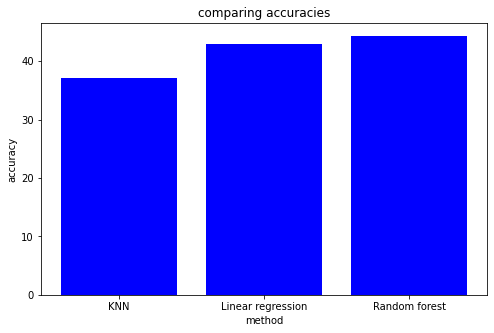

In [40]:
colnames = ["accuracy","names"]
acc = [[k_acc,"KNN"],[l_acc,"Linear regression"],[r_acc,"Random forest"]]

mydataframe = pd.DataFrame(acc,columns=colnames)
plt.figure(figsize=(8,5))
plt.bar("names", "accuracy", data = mydataframe, color = "blue")
plt.xlabel("method")
plt.ylabel("accuracy")
plt.title("comparing accuracies")
plt.show()

## Score prediction

In [41]:
a = np.array([0,1,2,3,4,5,6,7,8,9,10])
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1

In [59]:
for i in range(len(consistent_teams)):
    print(i,consistent_teams[i])
bat_team = int(input("Please input the bat team from the list(0-10): "))
print()
print("You chose: ",consistent_teams[bat_team])
bat_team = b[bat_team]

0 England
1 India
2 Pakistan
3 Sri Lanka
4 Australia
5 South Africa
6 New Zealand
7 Bangladesh
8 West Indies
9 Ireland
10 Zimbabwe
Please input the bat team from the list(0-10): 6

You chose:  New Zealand


In [60]:
for i in range(len(consistent_teams)):
    print(i,consistent_teams[i])
bowl_team = int(input("Please input the bowl team from the list(0-10): "))
print()
print("You chose: ",consistent_teams[bowl_team])
bowl_team = b[bowl_team]

0 England
1 India
2 Pakistan
3 Sri Lanka
4 Australia
5 South Africa
6 New Zealand
7 Bangladesh
8 West Indies
9 Ireland
10 Zimbabwe
Please input the bowl team from the list(0-10): 1

You chose:  India


In [61]:
overs = float(input("Please enter the current over(>5.0): "))

runs = int(input("Please enter the current score: "))

wickets = int(input("Please enter the wickets fallen: "))

runs_last_5 = int(input("Please enter the runs scored in last 5 overs: "))

wickets_last_5 = int(input("Please enter the wickets fallen in last 5 overs: "))

Please enter the current over(>5.0): 34
Please enter the current score: 170
Please enter the wickets fallen: 3
Please enter the runs scored in last 5 overs: 30
Please enter the wickets fallen in last 5 overs: 1


In [62]:
#making a vector out of the values
data=[]
for i in bat_team:
    data.append(i)
for i in bowl_team:
    data.append(i)
data.append(overs)
data.append(runs)
data.append(wickets)
data.append(runs_last_5)
data.append(wickets_last_5)
data=np.array([data])

In [63]:
print("Predicted Score from all three regressor's are: ")
print(int(lr.predict(data)))
print(int(knn.predict(data)))
pred=int(rf.predict(data))
print(int(rf.predict(data)))

Predicted Score from all three regressor's are: 
280
259
268


In [64]:
print("So the average score is from {} to {}".format(pred-10,pred+10))

So the average score is from 258 to 278


In [65]:
import pickle
# Creating a pickle file for the classifier
filename = 'odimodel.pkl'
pickle.dump(rf, open(filename, 'wb'))